# New York City Taxi Trip Duration Prediction

## 1. Постановка задачи

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
display(taxi_data.head())
print()
print(taxi_data.info())


Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(
    taxi_data['pickup_datetime'],
    format='%Y-%m-%d %H:%M:%S'
)

display(taxi_data['pickup_datetime'].head())

# Отбрасываем время, оставляя только даты
pickup_dates = taxi_data['pickup_datetime'].dt.date

# Выводим минимальную и максимальную дату
print("Минимальная дата в данных:", pickup_dates.min())
print("Максимальная дата в данных:", pickup_dates.max())

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

Минимальная дата в данных: 2016-01-01
Максимальная дата в данных: 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
# ваш код здесь
# Подсчёт пропусков по всей таблице
total_missing = taxi_data.isnull().sum().sum()
print("Суммарное количество пропущенных значений:", total_missing)

Суммарное количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
# ваш код здесь
display(taxi_data.describe().T)
print()
display(taxi_data.describe(include='object').T)

print("Уникальные значения vendor_id:", taxi_data['vendor_id'].unique())

,count,mean,min,25%,50%,75%,max,std
vendor_id,1458644.0,1.53495,1.0,1.0,2.0,2.0,2.0,0.498777
pickup_datetime,1458644,2016-04-01 10:10:24.940037120,2016-01-01 00:00:17,2016-02-17 16:46:04.249999872,2016-04-01 17:19:40,2016-05-15 03:56:08.750000128,2016-06-30 23:59:39,NaN
passenger_count,1458644.0,1.66453,0.0,1.0,1.0,2.0,9.0,1.314242
pickup_longitude,1458644.0,-73.973486,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529,0.070902
pickup_latitude,1458644.0,40.750921,34.359695,40.737347,40.754101,40.76836,51.881084,0.032881
dropoff_longitude,1458644.0,-73.973416,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529,0.070643
dropoff_latitude,1458644.0,40.7518,32.181141,40.735885,40.754524,40.76981,43.921028,0.035891
trip_duration,1458644.0,959.492273,1.0,397.0,662.0,1075.0,3526282.0,5237.431724


,count,unique,top,freq
id,1458644,1458644,id2875421,1
dropoff_datetime,1458644,1380377,2016-02-19 19:25:04,5
store_and_fwd_flag,1458644,2,N,1450599


Уникальные значения vendor_id: [2 1]


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
# ваш код здесь
def add_datetime_features(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    return df

taxi_data = add_datetime_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5


In [7]:
print("Количество поездок в субботу:", (taxi_data['pickup_day_of_week'] == 5).sum())

avg_rides_per_day = round(taxi_data.shape[0] / taxi_data['pickup_date'].nunique())
print(f"Среднее количество поездок в день: {avg_rides_per_day}")

Количество поездок в субботу: 220868
Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [8]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
display(holiday_data)

# ваш код здесь
def add_holiday_features(taxi_df, holiday_df):
    # Приводим столбец дат праздников в datetime
    holiday_df['date'] = pd.to_datetime(holiday_df['date']).dt.date

    # Признак праздника: 1 — праздник, 0 — нет
    holiday_set = set(holiday_df['date'])

    taxi_df['pickup_holiday'] = taxi_df['pickup_date'].isin(holiday_set).astype(int)

    return taxi_df


taxi_data = add_holiday_features(taxi_data, holiday_data)

median_holiday_duration = round(
    taxi_data.loc[taxi_data['pickup_holiday'] == 1, 'trip_duration'].median()
)

print("Медианная длительность поездки в праздничные дни (сек):", median_holiday_duration)

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


Медианная длительность поездки в праздничные дни (сек): 585


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [9]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')

display(osrm_data.head())

# ваш код здесь
def add_osrm_features(taxi_data, osrm_data):
    # Оставим только нужные столбцы
    osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    
    # Объединяем таблицы по 'id'
    merged_data = taxi_data.merge(osrm_data, on='id', how='left')
    
    return merged_data

# Применяем функцию
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Вычисляем медиану trip_duration и total_travel_time
median_trip_duration = taxi_data['trip_duration'].median()
median_osrm_duration = taxi_data['total_travel_time'].median()

# Разница медиан
diff_median = round(abs(median_trip_duration - median_osrm_duration))
print(f"Разница медианных значений (в секундах): {diff_median}")

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


Разница медианных значений (в секундах): 372


In [10]:
# Проверим количество строк с пропусками в столбцах, полученных из OSRM
osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
missing_osrm_rows = taxi_data[osrm_cols].isnull().any(axis=1).sum()

print(f"Количество строк с пропусками после объединения: {missing_osrm_rows}")

Количество строк с пропусками после объединения: 1


In [11]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [12]:
# ваш код здесь
def add_geographical_features(df):
    df['haversine_distance'] = get_haversine_distance(
        df['pickup_latitude'],
        df['pickup_longitude'],
        df['dropoff_latitude'],
        df['dropoff_longitude']
    )
    df['direction'] = get_angle_direction(
        df['pickup_latitude'],
        df['pickup_longitude'],
        df['dropoff_latitude'],
        df['dropoff_longitude']
    )
    return df

# Применим к таблице
taxi_data = add_geographical_features(taxi_data)

# Выведем медианное расстояние по формуле гаверсинуса
median_distance = round(taxi_data['haversine_distance'].median(), 2)
print("Медианное расстояние по формуле гаверсинуса (км):", median_distance)

Медианное расстояние по формуле гаверсинуса (км): 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [13]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(df, kmeans_model):
    # Формируем признаки из координат
    coords = np.hstack((
        df[['pickup_latitude', 'pickup_longitude']],
        df[['dropoff_latitude', 'dropoff_longitude']]
    ))
    
    # Применяем кластеризацию
    df['geo_cluster'] = kmeans_model.predict(coords)
    
    return df

# Применяем функцию к данным
taxi_data = add_cluster_features(taxi_data, kmeans)

# Считаем размер каждого кластера и выводим минимальный
cluster_sizes = taxi_data['geo_cluster'].value_counts()
min_cluster_size = cluster_sizes.min()
print("Количество поездок в наименьшем геокластере:", min_cluster_size)

Количество поездок в наименьшем геокластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [14]:
weather_data = pd.read_csv('data/weather_data.csv')
display(weather_data.head())

# ваш код здесь
def add_weather_features(taxi_data, weather_data):
    # Приводим даты к строковому формату YYYY-MM-DD
    taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date']).dt.strftime('%Y-%m-%d')
    weather_data['date'] = pd.to_datetime(weather_data['date']).dt.strftime('%Y-%m-%d')

    # Убедимся, что типы совпадают
    taxi_data['pickup_hour'] = taxi_data['pickup_hour'].astype(int)
    weather_data['hour'] = weather_data['hour'].astype(int)

    # Удаляем лишние столбцы
    weather_data_clean = weather_data[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]

    # Объединяем таблицы
    merged_data = taxi_data.merge(
        weather_data_clean,
        how='left',
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour']
    )

    # Удаляем временные столбцы
    merged_data.drop(columns=['date', 'hour'], inplace=True)

    return merged_data

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


In [15]:
taxi_data = add_weather_features(taxi_data, weather_data)

print(taxi_data['events'].value_counts(dropna=False))
print("Количество поездок в снежную погоду:", taxi_data[taxi_data['events'].str.contains('Snow', na=False)].shape[0])

events
NaN     1387217
Rain      58300
Snow      13126
Fog           1
Name: count, dtype: int64
Количество поездок в снежную погоду: 13126


In [16]:
# Список погодных столбцов
weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']

# Маска строк, у которых пропуски во всех этих столбцах
mask_all_weather_missing = taxi_data[weather_columns].isnull().all(axis=1)

# Расчет доли таких строк в процентах
missing_pct = round(mask_all_weather_missing.mean() * 100, 2)
print("Доля строк с пропусками во всех погодных столбцах (в %):", missing_pct)

Доля строк с пропусками во всех погодных столбцах (в %): 0.82


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [17]:
# ваш код здесь
def fill_null_weather_data(data):
    # Список погодных столбцов
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    
    # Заполняем пропуски медианой по каждой дате
    for col in weather_cols:
        data[col] = data[col].fillna(
            data.groupby('pickup_date')[col].transform('median')
        )
    
    # Заполняем пропуски в events строкой 'None'
    data['events'] = data['events'].fillna('None')
    
    # Столбцы из OSRM API
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    # Заполняем пропуски медианой по всему столбцу
    for col in osrm_cols:
        data[col] = data[col].fillna(data[col].median())
    
    return data

# Применяем функцию
taxi_data = fill_null_weather_data(taxi_data)

# Выводим медиану в столбце temperature
median_temp = round(taxi_data['temperature'].median(), 1)
print("Медиана температуры после заполнения пропусков:", median_temp)

Медиана температуры после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


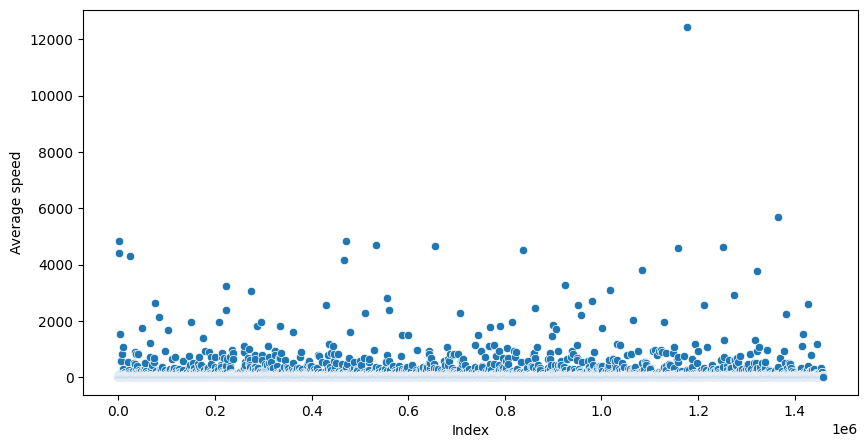

In [18]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [19]:
# ваш код здесь
# Задаем порог в секундах: 24 часа = 86400 секунд
threshold_duration = 24 * 60 * 60

# Считаем количество выбросов
num_outliers = taxi_data[taxi_data['trip_duration'] > threshold_duration].shape[0]
print(f"Количество выбросов по длительности поездки: {num_outliers}")

# Удаляем выбросы
taxi_data = taxi_data[taxi_data['trip_duration'] <= threshold_duration]

Количество выбросов по длительности поездки: 4


In [20]:
# Вычисляем среднюю скорость (в км/ч)
taxi_data['avg_speed'] = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Считаем количество выбросов по скорости
speed_outliers = taxi_data[taxi_data['avg_speed'] > 300].shape[0]
print(f"Количество выбросов по скорости: {speed_outliers}")

# Удаляем выбросы
taxi_data = taxi_data[taxi_data['avg_speed'] <= 300]

Количество выбросов по скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [21]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

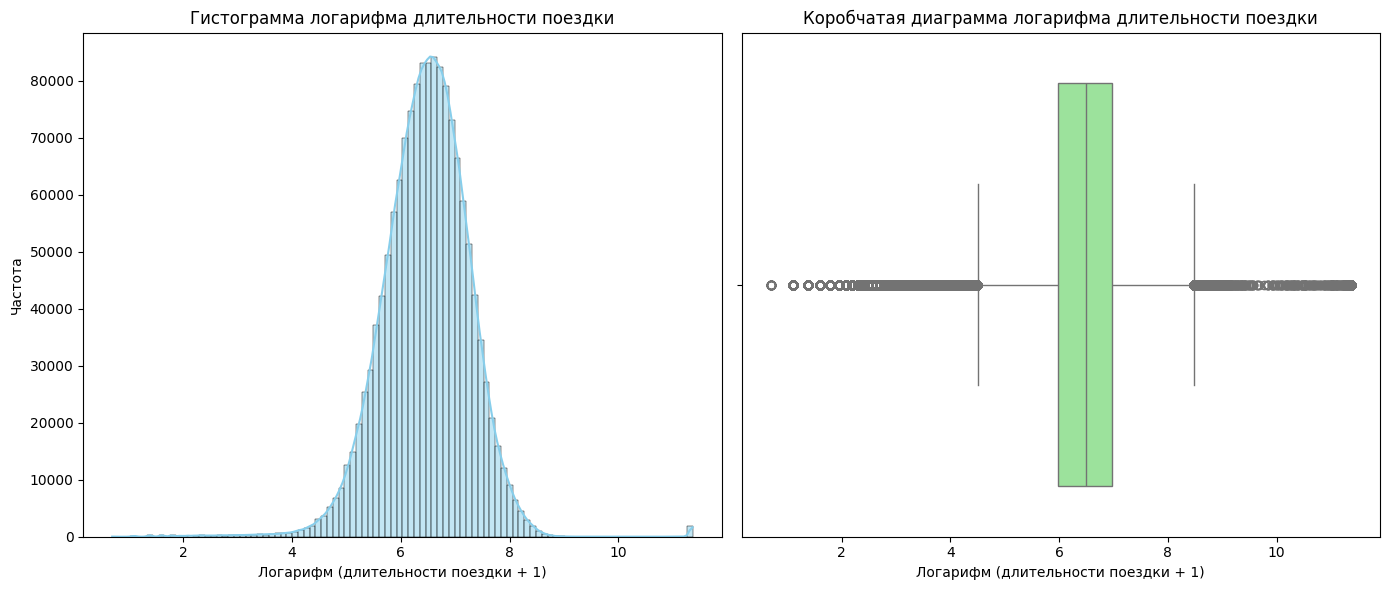

In [22]:
# ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(taxi_data['trip_duration_log'], bins=100, kde=True, color='skyblue')
plt.title('Гистограмма логарифма длительности поездки')
plt.xlabel('Логарифм (длительности поездки + 1)')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=taxi_data['trip_duration_log'], color='lightgreen')
plt.title('Коробчатая диаграмма логарифма длительности поездки')
plt.xlabel('Логарифм (длительности поездки + 1)')

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import normaltest

# Проведём тест нормальности
stat, p_value = normaltest(taxi_data['trip_duration_log'])

# Выведем округлённый результат
print("p-value:", round(p_value, 2))

p-value: 0.0


*Распределение длительности поездки в логарифмическом масштабе статистически отличается от нормального (p-value < 0.05).*

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

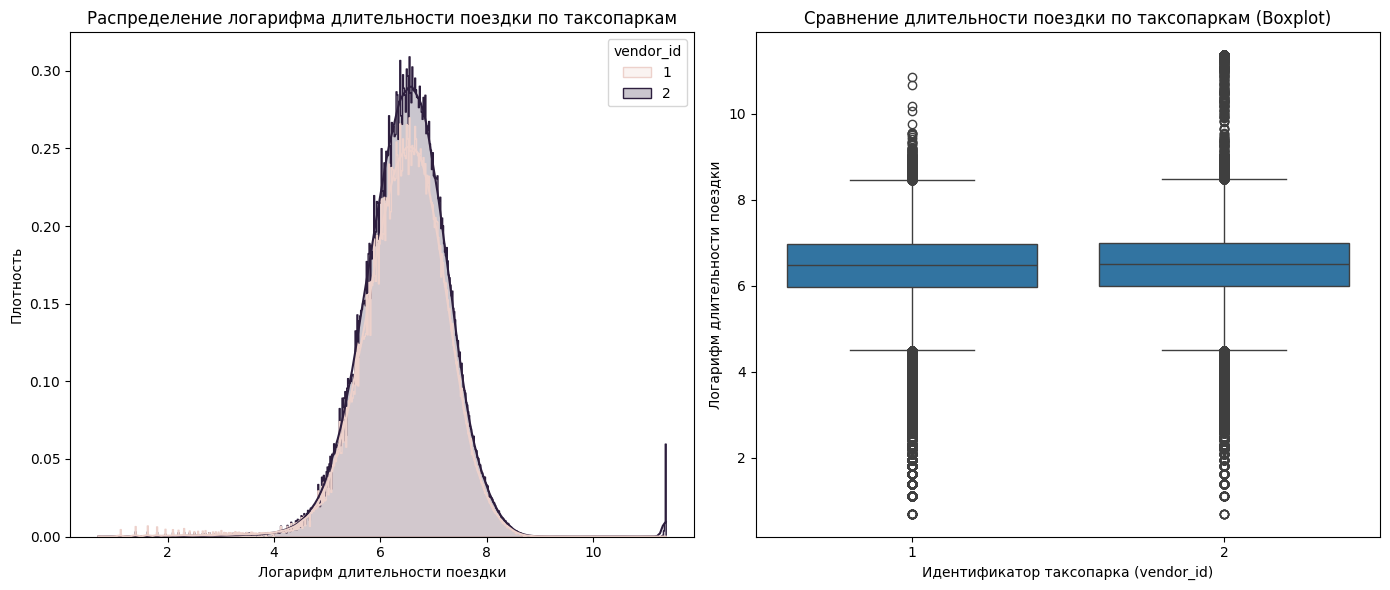

In [24]:
# ваш код здесь
# Построим гистограмму и коробчатую диаграмму trip_duration_log по vendor_id
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data=taxi_data, x='trip_duration_log', hue='vendor_id', kde=True, element='step', stat='density')
plt.title('Распределение логарифма длительности поездки по таксопаркам')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Плотность')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=taxi_data, x='vendor_id', y='trip_duration_log')
plt.title('Сравнение длительности поездки по таксопаркам (Boxplot)')
plt.xlabel('Идентификатор таксопарка (vendor_id)')
plt.ylabel('Логарифм длительности поездки')

plt.tight_layout()
plt.show()

*Распределение логарифма длительности поездки практически не зависит от таксопарка (vendor_id), что говорит о слабом влиянии этого признака на целевую переменную.*

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

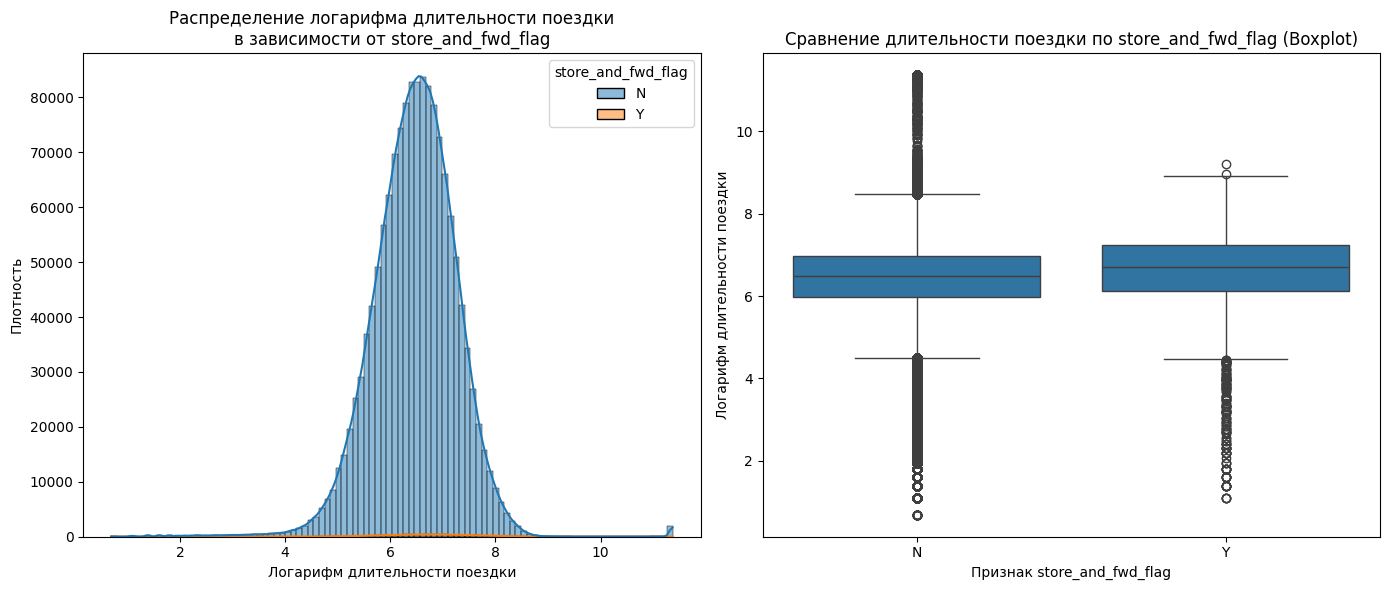

In [25]:
# ваш код здесь
# Визуализация распределения длительности поездки в логарифмическом масштабе
# в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag)

plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data=taxi_data, x='trip_duration_log', hue='store_and_fwd_flag', bins=100, kde=True)
plt.title('Распределение логарифма длительности поездки\nв зависимости от store_and_fwd_flag')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Плотность')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log')
plt.title('Сравнение длительности поездки по store_and_fwd_flag (Boxplot)')
plt.xlabel('Признак store_and_fwd_flag')
plt.ylabel('Логарифм длительности поездки')

plt.tight_layout()
plt.show()

*Средняя длительность поездок с флагом `store_and_fwd_flag = Y` немного выше, чем у поездок с флагом `N`. Распределения в целом похожи, но поездки с флагом `Y` содержат больше выбросов с большой длительностью. Наиболее же длительные поездки наблюдаются в группе `store_and_fwd_flag = N`, тогда как флаг `Y` характерен в основном для коротких поездок. Это указывает на то, что флаг пересылки не используется при длительных или аномальных поездках, что делает признак потенциально значимым для анализа длительности.*

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

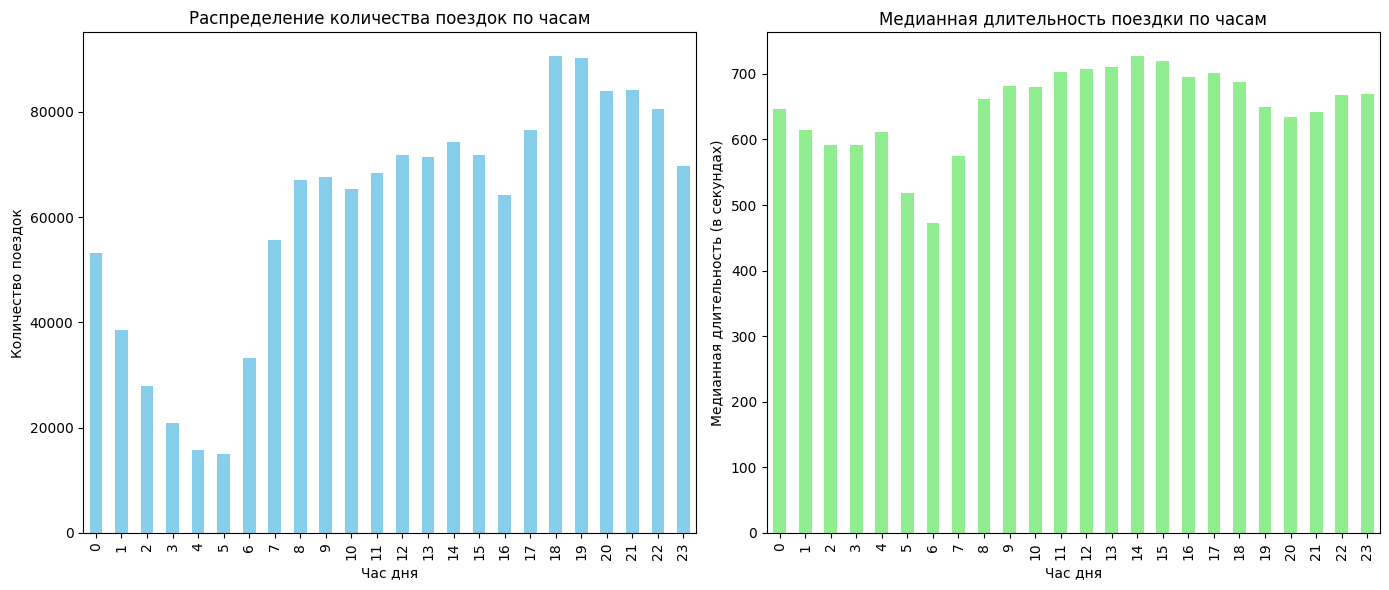

In [26]:
# ваш код здесь
# Построим график распределения количества поездок по часам
plt.figure(figsize=(14, 6))

# Количество поездок по часам
plt.subplot(1, 2, 1)
taxi_data['pickup_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Распределение количества поездок по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')

# Медианная длительность поездки по часам
plt.subplot(1, 2, 2)
taxi_data.groupby('pickup_hour')['trip_duration'].median().plot(kind='bar', color='lightgreen')
plt.title('Медианная длительность поездки по часам')
plt.xlabel('Час дня')
plt.ylabel('Медианная длительность (в секундах)')

plt.tight_layout()
plt.show()

*На графике видно, что количество поездок минимально в ранние утренние часы (3–5 часов), а затем резко возрастает, достигая пика в вечернее время (18–20 часов). Медианная длительность поездки также демонстрирует суточные колебания: она наиболее низкая в утренние часы (5–7 часов), а максимальная — в дневные часы (14–16 часов). Это может быть связано с пробками в часы пик.*

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


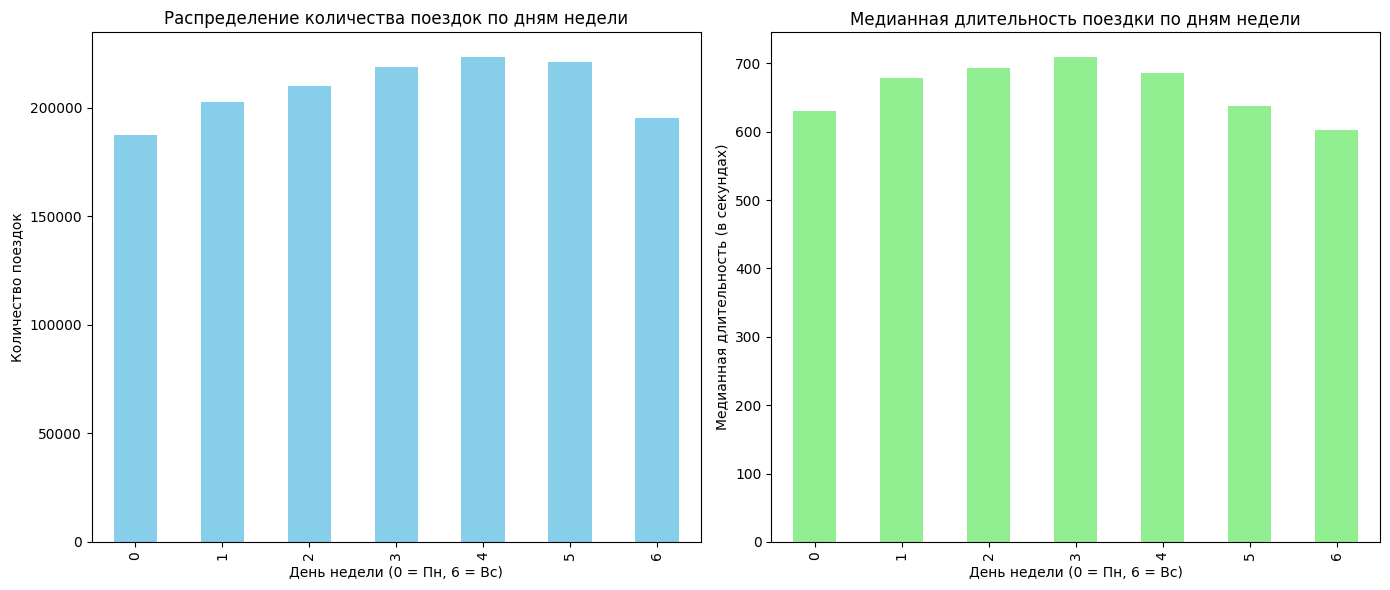

In [27]:
# ваш код здесь
# Распределение количества поездок по дням недели
trips_by_day = taxi_data['pickup_day_of_week'].value_counts().sort_index()

# Медианная длительность поездки по дням недели
median_duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

# Визуализация
plt.figure(figsize=(14, 6))

# График количества поездок
plt.subplot(1, 2, 1)
trips_by_day.plot(kind='bar', color='skyblue')
plt.title('Распределение количества поездок по дням недели')
plt.xlabel('День недели (0 = Пн, 6 = Вс)')
plt.ylabel('Количество поездок')

# График медианной длительности
plt.subplot(1, 2, 2)
median_duration_by_day.plot(kind='bar', color='lightgreen')
plt.title('Медианная длительность поездки по дням недели')
plt.xlabel('День недели (0 = Пн, 6 = Вс)')
plt.ylabel('Медианная длительность (в секундах)')

plt.tight_layout()
plt.show()

*- Наибольшее количество поездок совершается в будние дни, особенно в четверг и пятницу. Меньше всего поездок — в воскресенье.* 

*- Медианная длительность поездки выше в середине недели (особенно в среду и четверг), а в выходные (воскресенье и суббота) она заметно снижается.*

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

pickup_day_of_week,0,1,2,3,4,5,6
pickup_hour,,,,,,,
0,598.0,591.0,601.0,609.0,649.0,685.0,675.0
1,567.0,584.0,553.0,564.0,600.0,640.0,643.0
2,565.0,565.0,544.0,576.0,572.0,610.0,604.5
3,600.0,568.0,574.0,584.0,578.0,591.0,608.0
4,640.0,600.5,616.0,595.0,634.0,610.0,598.5
5,519.0,455.0,448.0,480.0,532.0,631.0,634.0
6,462.0,461.0,463.0,471.0,476.0,508.0,554.0
7,575.0,586.0,593.0,599.0,578.0,481.0,474.0
8,672.0,703.0,704.0,721.0,689.0,489.0,460.0


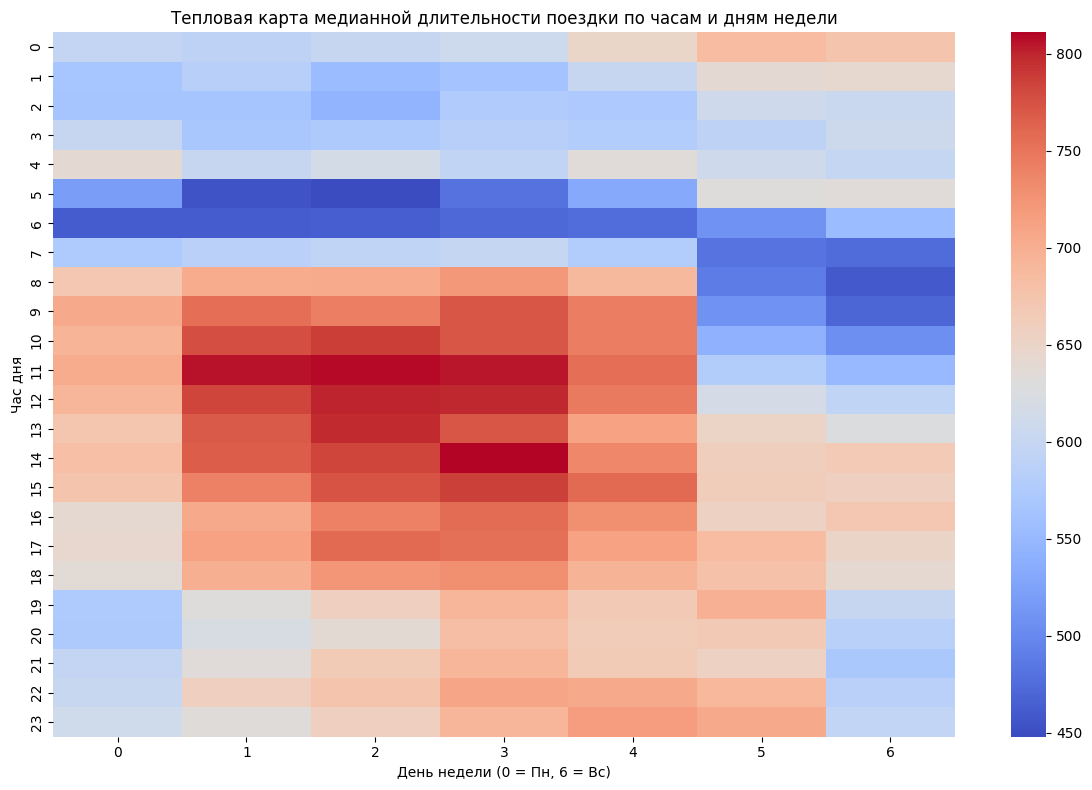

In [28]:
# ваш код здесь
# Создание сводной таблицы: строки — часы, столбцы — дни недели, значения — медианная длительность поездки
pivot_table = taxi_data.pivot_table(
    index='pickup_hour',
    columns='pickup_day_of_week',
    values='trip_duration',
    aggfunc='median'
)

# Отображение результата
display(pivot_table)


# Установка размеров графика
plt.figure(figsize=(12, 8))

# Построение тепловой карты
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)

# Настройки графика
plt.title('Тепловая карта медианной длительности поездки по часам и дням недели')
plt.xlabel('День недели (0 = Пн, 6 = Вс)')
plt.ylabel('Час дня')
plt.tight_layout()
plt.show()

*- Наибольшая медианная длительность поездки наблюдается в будние дни (Пн–Пт) с 9 до 15 часов. Особенно выделяются вторник и среда (час пик — 11–14 ч.).*  

*- В выходные (Сб–Вс) продолжительность поездок заметно ниже, особенно утром и до 10 часов.*  

*- Минимальная медианная длительность наблюдается в ранние утренние часы (5–7 ч.) на всех днях недели.*  

*- Вечером (с 18 до 23 ч.) длительность поездок выравнивается и снижается, особенно по воскресеньям.*

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


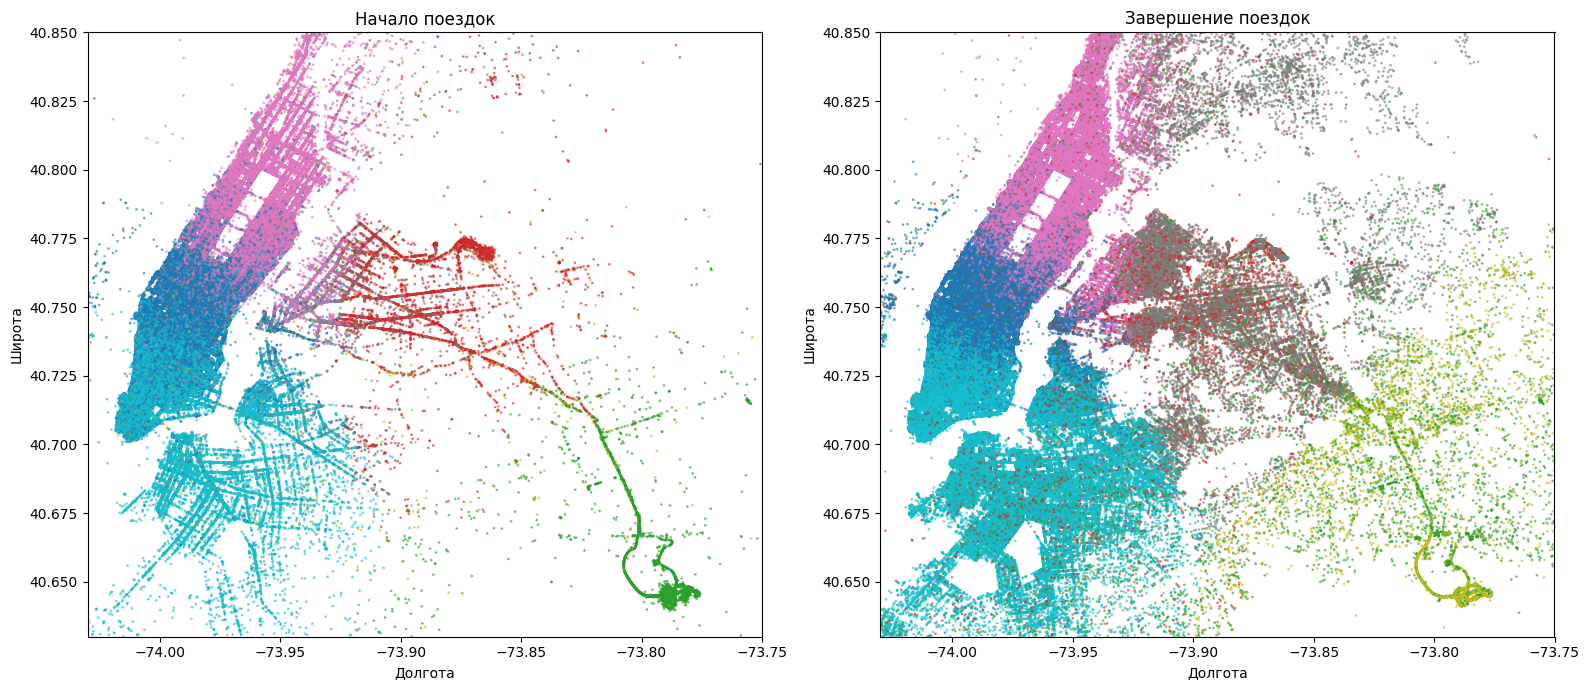

In [29]:
# ваш код здесь
# Границы города
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Фильтрация по границам
pickup_filtered = taxi_data[
    (taxi_data['pickup_longitude'].between(*city_long_border)) &
    (taxi_data['pickup_latitude'].between(*city_lat_border))
]

dropoff_filtered = taxi_data[
    (taxi_data['dropoff_longitude'].between(*city_long_border)) &
    (taxi_data['dropoff_latitude'].between(*city_lat_border))
]

# Построение диаграмм
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Точки начала поездок
axes[0].scatter(
    pickup_filtered['pickup_longitude'],
    pickup_filtered['pickup_latitude'],
    c=pickup_filtered['geo_cluster'],
    cmap='tab10',
    s=1,
    alpha=0.5
)
axes[0].set_title('Начало поездок')
axes[0].set_xlim(city_long_border)
axes[0].set_ylim(city_lat_border)
axes[0].set_xlabel('Долгота')
axes[0].set_ylabel('Широта')

# Точки завершения поездок
axes[1].scatter(
    dropoff_filtered['dropoff_longitude'],
    dropoff_filtered['dropoff_latitude'],
    c=dropoff_filtered['geo_cluster'],
    cmap='tab10',
    s=1,
    alpha=0.5
)
axes[1].set_title('Завершение поездок')
axes[1].set_xlim(city_long_border)
axes[1].set_ylim(city_lat_border)
axes[1].set_xlabel('Долгота')
axes[1].set_ylabel('Широта')

plt.tight_layout()
plt.show()

*1. **Манхэттен** — хорошо различим как отдельный плотный кластер (северная часть карты, средняя долгота), с высокой концентрацией как начальных, так и конечных точек. Вероятно, это самый активный район по числу поездок, особенно в деловой части острова.*

*2. **Аэропорт JFK** — один из кластеров, сосредоточенный в юго-восточной части карты (в области с долготой около –73.78 и широтой около 40.64). Отсюда начинаются и заканчиваются длинные поездки, протянувшиеся на запад — скорее всего, поездки из/в аэропорт.*  

*3. **Бруклин** и **Куинс** — кластеры южнее и восточнее Манхэттена, с хорошо различимыми улицами и сеткой дорог. Видна активность поездок внутри районов и в сторону Манхэттена.*

*4. **Бронкс** — севернее Манхэттена, менее плотный, но отдельный кластер, куда совершается часть поездок.*

*5. **Низкоплотные кластеры или выбросы** — есть отдельные группы точек за пределами города (не вошедшие в отображение) — скорее всего, это поездки в пригороды, аэропорты или выбросы (ошибочные координаты).*

*6. **Цветовое разделение** позволяет понять, что поездки часто начинаются и заканчиваются внутри одного и того же геокластера, особенно в деловых и туристических районах.*

*7. **Транспортные коридоры** — отчётливо видны «дорожные» линии между кластерами, особенно между аэропортом и Манхэттеном, что указывает на популярные маршруты.*

***Общий вывод:** кластеры отражают географическое и функциональное деление города: центр (Манхэттен), спальные районы, аэропорты, и межрайонные маршруты. Это даёт ценную информацию для моделирования, ценообразования и логистики.*

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [30]:
taxi_data = taxi_data.drop('avg_speed', axis=1)

In [31]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [32]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [33]:
# ваш код здесь
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [34]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [35]:
# ваш код здесь
# Кодирование категориальных бинарных признаков

# vendor_id: 0 → если 1, иначе 1
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# store_and_fwd_flag: 0 → 'N', 1 → всё остальное
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Средние значения
vendor_mean = round(train_data['vendor_id'].mean(), 2)
store_flag_mean = round(train_data['store_and_fwd_flag'].mean(), 3)

vendor_mean, store_flag_mean

(np.float64(0.53), np.float64(0.006))

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [36]:
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder

# Определяем признаки для кодирования
categorical_features = ['pickup_day_of_week', 'geo_cluster', 'events']

# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Применяем кодирование к выбранным признакам
data_onehot_array = one_hot_encoder.fit_transform(train_data[categorical_features]).toarray()

# Получаем имена новых столбцов
column_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Преобразуем результат в DataFrame
data_onehot = pd.DataFrame(data_onehot_array, columns=column_names)

# Проверим результат (по желанию)
data_onehot.head()

,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
data_onehot.shape

(1458233, 18)

Добавим полученную таблицу с закодированными признаками:

In [38]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [39]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [40]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [41]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest, f_regression

# Инициализируем селектор
selector = SelectKBest(score_func=f_regression, k=25)

# Обучаем селектор на тренировочных данных
selector.fit(X_train, y_train_log)

# Получаем отобранные признаки
selected_features = X_train.columns[selector.get_support()]

# Сохраняем их в новый датафрейм
X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]

# Выводим список отобранных признаков
print("Отобранные признаки:")
for feature in selected_features:
    print(feature)


# Оставляем только отобранные признаки
X_train = X_train[selected_features]
X_valid = X_valid[selected_features]    


Отобранные признаки:
vendor_id
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag
pickup_hour
pickup_holiday
total_distance
total_travel_time
number_of_steps
haversine_distance
temperature
pickup_day_of_week_1
pickup_day_of_week_2
pickup_day_of_week_3
pickup_day_of_week_4
pickup_day_of_week_5
pickup_day_of_week_6
geo_cluster_2
geo_cluster_3
geo_cluster_6
geo_cluster_7
geo_cluster_8


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [42]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler

# Инициализируем нормализатор
scaler = MinMaxScaler()

# Обучаем на обучающей выборке и трансформируем обе выборки
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Рассчитываем среднее значение по первому признаку в валидационной выборке
mean_first_feature = X_valid_scaled[:, 0].mean()
print("Среднее по первому признаку валидационной выборки:", round(mean_first_feature, 2))

Среднее по первому признаку валидационной выборки: 0.54


In [43]:
# Преобразуем обратно в DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)

X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  float64
 1   passenger_count       977016 non-null  float64
 2   pickup_longitude      977016 non-null  float64
 3   pickup_latitude       977016 non-null  float64
 4   dropoff_longitude     977016 non-null  float64
 5   dropoff_latitude      977016 non-null  float64
 6   store_and_fwd_flag    977016 non-null  float64
 7   pickup_hour           977016 non-null  float64
 8   pickup_holiday        977016 non-null  float64
 9   total_distance        977016 non-null  float64
 10  total_travel_time     977016 non-null  float64
 11  number_of_steps       977016 non-null  float64
 12  haversine_distance    977016 non-null  float64
 13  temperature           977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64
 15  

In [44]:
# Преобразуем обратно в DataFrame
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=selected_features)

X_valid_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  float64
 1   passenger_count       481217 non-null  float64
 2   pickup_longitude      481217 non-null  float64
 3   pickup_latitude       481217 non-null  float64
 4   dropoff_longitude     481217 non-null  float64
 5   dropoff_latitude      481217 non-null  float64
 6   store_and_fwd_flag    481217 non-null  float64
 7   pickup_hour           481217 non-null  float64
 8   pickup_holiday        481217 non-null  float64
 9   total_distance        481217 non-null  float64
 10  total_travel_time     481217 non-null  float64
 11  number_of_steps       481217 non-null  float64
 12  haversine_distance    481217 non-null  float64
 13  temperature           481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15  

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$




### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [45]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение модели линейной регрессии
linreg = LinearRegression()
linreg.fit(X_train_scaled_df, y_train_log)

# Предсказания
y_train_pred_log = linreg.predict(X_train_scaled_df)
y_valid_pred_log = linreg.predict(X_valid_scaled_df)

# Вычисление RMSLE вручную (так как логарифмирование уже применено)
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log))

print(f'RMSLE на тренировочной выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на тренировочной выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [46]:
# ваш код здесь
from sklearn.preprocessing import PolynomialFeatures

# Генерация полиномиальных признаков второй степени
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled_df)
X_valid_poly = poly.transform(X_valid_scaled_df)

# Обучение модели линейной регрессии на полиномиальных признаках
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_log)

# Предсказания
y_train_pred_poly = poly_model.predict(X_train_poly)
y_valid_pred_poly = poly_model.predict(X_valid_poly)

# Вычисление RMSLE
rmsle_train_poly = np.sqrt(mean_squared_error(y_train_log, y_train_pred_poly))
rmsle_valid_poly = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_poly))

print(f'RMSLE на тренировочной выборке: {rmsle_train_poly:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid_poly:.2f}')

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.69


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [47]:
# ваш код здесь
from sklearn.linear_model import Ridge

# Обучение модели Ridge-регрессии
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_poly, y_train_log)

# Предсказания
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_valid_pred_ridge = ridge_model.predict(X_valid_poly)

# Вычисление RMSLE (так как логарифм уже применён, используем RMSE)
rmsle_train_ridge = np.sqrt(mean_squared_error(y_train_log, y_train_pred_ridge))
rmsle_valid_ridge = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_ridge))

print(f'RMSLE на тренировочной выборке: {rmsle_train_ridge:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid_ridge:.2f}')

RMSLE на тренировочной выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [48]:
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor

# Обучение модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled_df, y_train_log)

# Предсказания
y_train_pred_tree = tree_model.predict(X_train_scaled_df)
y_valid_pred_tree = tree_model.predict(X_valid_scaled_df)

# Вычисление RMSLE (используем RMSE, так как y уже в логарифмах)
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_tree))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_tree))

print(f'RMSLE на тренировочной выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на тренировочной выборке: 0.00
RMSLE на валидационной выборке: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


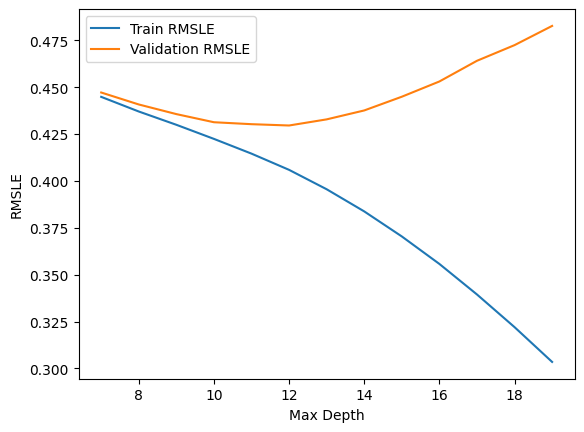

In [49]:
# ваш код здесь
train_rmsle = []
valid_rmsle = []
max_depths = range(7, 20)

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_scaled_df, y_train_log)

    y_train_pred = model.predict(X_train_scaled_df)
    y_valid_pred = model.predict(X_valid_scaled_df)

    train_rmsle.append(np.sqrt(mean_squared_error(y_train_log, y_train_pred)))
    valid_rmsle.append(np.sqrt(mean_squared_error(y_valid_log, y_valid_pred)))

# Для построения графика:
plt.plot(max_depths, train_rmsle, label='Train RMSLE')
plt.plot(max_depths, valid_rmsle, label='Validation RMSLE')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

*Судя по графику оптимальная глубина дерева решений - 12.*  
*Значения RMSLE при глубине дерева 12 выглядят сбалансировано — модель ещё не переобучается и при этом точнее, чем при меньших глубинах.*

In [50]:
# Обучение модели с оптимальной глубиной
best_tree = DecisionTreeRegressor(max_depth=12, random_state=42)
best_tree.fit(X_train_scaled_df, y_train_log)

# Предсказания
y_train_pred_log = best_tree.predict(X_train_scaled_df)
y_valid_pred_log = best_tree.predict(X_valid_scaled_df)

# Расчёт RMSLE
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log))

print(f'RMSLE на тренировочной выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [51]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor

# Обучение модели случайного леса
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)
rf_model.fit(X_train_scaled_df, y_train_log)

# Предсказания
y_train_pred_log_rf = rf_model.predict(X_train_scaled_df)
y_valid_pred_log_rf = rf_model.predict(X_valid_scaled_df)

# Расчёт RMSLE (для логарифмированной целевой переменной)
rmsle_train_rf = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log_rf))
rmsle_valid_rf = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log_rf))

print(f'RMSLE на тренировочной выборке: {rmsle_train_rf:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid_rf:.2f}')

RMSLE на тренировочной выборке: 0.40
RMSLE на валидационной выборке: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [52]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gbr = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
gbr.fit(X_train_scaled_df, y_train_log)

# Предсказания
y_train_pred_log = gbr.predict(X_train_scaled_df)
y_valid_pred_log = gbr.predict(X_valid_scaled_df)

# Вычисление RMSLE
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log))

print(f'RMSLE на тренировочной выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


*Модель градиентного бустинга над деревьями решений показала наилучший результат, достигнув наименьшего значения RMSLE на валидационной выборке — **0.39**.*

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


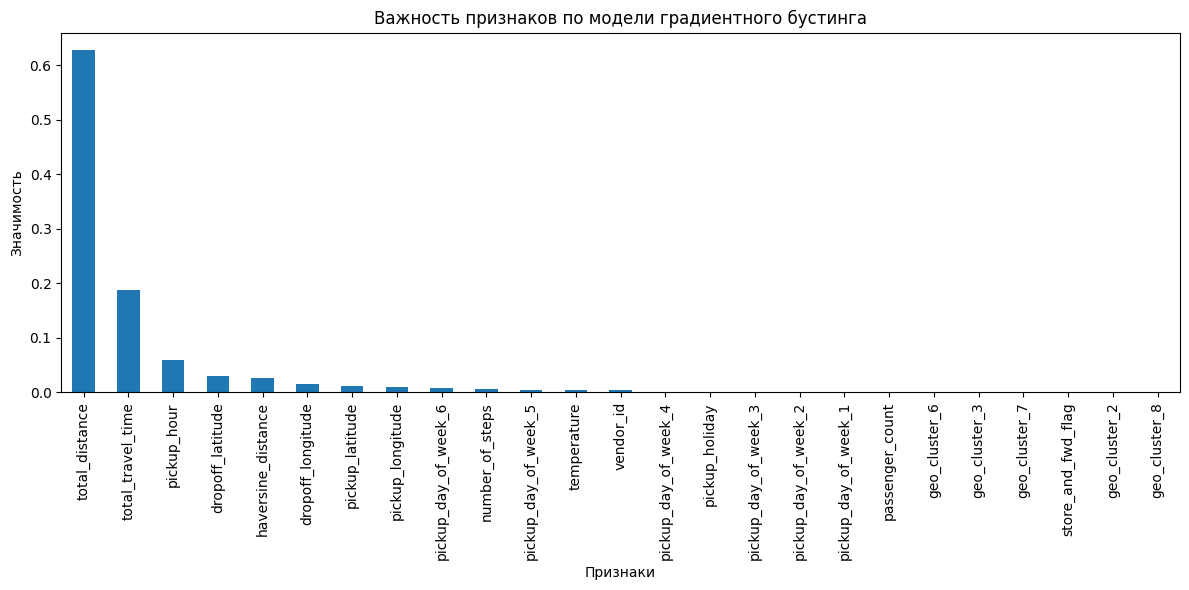

In [53]:
# ваш код здесь
# Получаем важности признаков
feature_importances = pd.Series(gbr.feature_importances_, index=X_train_scaled_df.columns)

# Строим столбчатую диаграмму (опционально — отсортированную)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Важность признаков по модели градиентного бустинга')
plt.ylabel('Значимость')
plt.xlabel('Признаки')
plt.tight_layout()
plt.show()

*1.	**total_distance** — абсолютный лидер по значимости. Это логично: чем длиннее маршрут, тем дольше длится поездка.*  

*2.	**total_travel_time** — отражает предполагаемое время в пути по шагам маршрута. Является очень сильным предиктором, так как учитывает данные о времени между промежуточными точками.*  

*3.	**pickup_hour** — час начала поездки. Важен из-за влияния трафика: часы пик, ночное время и т.п. напрямую влияют на длительность.*  


*Эти три признака дают наибольший вклад в предсказание целевого значения.*

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [54]:
# ваш код здесь
from sklearn.metrics import median_absolute_error

# Переводим предсказания и истинные значения обратно из логарифмического масштаба
y_valid_pred_original = np.exp(y_valid_pred_log) - 1
y_valid_original = np.exp(y_valid_log) - 1

# Вычисляем медианную абсолютную ошибку
meae = median_absolute_error(y_valid_original, y_valid_pred_original)

# Переводим ошибку из секунд в минуты
meae_minutes = meae / 60
print(f"Медианная абсолютная ошибка (в минутах): {meae_minutes:.1f}")

Медианная абсолютная ошибка (в минутах): 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [64]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [65]:

def fill_null_weather_data(data):
    # Точно определяем правильные названия столбцов
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    weather_cols = [col for col in weather_cols if col in data.columns]

    for col in weather_cols:
        data[col] = data[col].fillna(
            data.groupby('pickup_date')[col].transform('median')
        )

    if 'events' in data.columns:
        data['events'] = data['events'].fillna('None')

    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    osrm_cols = [col for col in osrm_cols if col in data.columns]

    for col in osrm_cols:
        data[col] = data[col].fillna(data[col].median())

    return data


def add_osrm_features(df, osrm_data):
    osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    merged_data = df.merge(osrm_data, on='id', how='left')
    return merged_data

In [66]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [68]:
# ваш код здесь
# Предсказание логарифма длительности поездки для тестовой выборки
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)
y_test_pred_log = gbr.predict(X_test_scaled_df)

# Перевод предсказаний из логарифмического масштаба в исходный
y_test_predict = np.exp(y_test_pred_log) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### ВЫВОД

В рамках проекта была решена задача регрессии — предсказание длительности поездки на такси в Нью-Йорке. В ходе работы были реализованы следующие этапы:

- Проведена расширенная предобработка данных: извлечены временные, географические, погодные и кластерные признаки.  

- Обучены модели: линейная регрессия, полиномиальная регрессия, дерево решений, случайный лес и градиентный бустинг.  

- Лучший результат показала модель градиентного бустинга (`GradientBoostingRegressor`) с RMSLE = **0.39** на валидационной выборке.  

- Проведён анализ важности признаков: наибольший вклад внесли `total_distance`, `total_travel_time` и `pickup_hour`.  

- Расчёт медианной абсолютной ошибки (MeAE) дал значение **1.8 минуты**, что свидетельствует о высокой точности модели с точки зрения бизнеса.  

- Финальный сабмит был успешно сделан на Kaggle, где модель показала **Private Score = 0.39996**.
